In [64]:
def get_financial_stats(ticker):
    import requests
    from bs4 import BeautifulSoup
    url = "https://finance.yahoo.com/quote/" + ticker + "/key-statistics?p=" + ticker
    response = requests.get(url)
    results_page = BeautifulSoup(response.content,'lxml')
    stats_lists = results_page.find_all('table')
    test_list = list()
    for i in stats_lists:
        stat_name = i.find_all('span')
        stock_stat = i.find_all('td',class_='Fz(s) Fw(500) Ta(end)')
        for j in range(len(stock_stat)):
            if not stat_name[j].get_text() == 'N/A':
                test_list.append((stat_name[j].get_text(),stock_stat[j].get_text()))
    return test_list

In [65]:
def get_row(ticker,measure_list):
    from pandas_datareader import data as web
    a = get_financial_stats(ticker)
    a_row = list()
    a_row.append(round(web.DataReader(ticker,"yahoo").iloc[-1,3],2))
    for i in measure_list:
        if not i == "Price":
            appended = 0
            for j in a:
                if j[0] == i:
                    a_row.append(j[1])
                    appended = 1
            if appended == 0:
                a_row.append('N/A')   
    return a_row

In [66]:
def comp_stat_table(stock):
    import pandas as pd
    import numpy as np
    measure_list = ['Price','Market Cap (intraday)', 'Enterprise Value', 'Forward P/E', 'EBITDA', 'Total Cash Per Share', 'Dividend Date', 'Ex-Dividend Date', 'Last Split Factor (new per old)', '52 Week High']
    r = get_competitors(stock)
    r.insert(0, stock)
    a_row = get_row(r[1],measure_list)
    b_row = get_row(r[2],measure_list)
    c_row = get_row(r[3],measure_list)
    d_row = get_row(r[4],measure_list)
    s_row = get_row(stock,measure_list)
    stats_list = [s_row,a_row,b_row,c_row,d_row]
    final_table = pd.DataFrame(stats_list,index = r, columns = measure_list)
    print(' ')
    print('Key Competitor Statistics')
    display(final_table)

In [61]:
comp_stat_table('AAPL')

,Price,Market Cap (intraday),Enterprise Value,Forward P/E,EBITDA,Total Cash Per Share,Dividend Date,Ex-Dividend Date,Last Split Factor (new per old),52 Week High
AZO,809.07,20.68B,25.93B,13.18,2.48B,10.85,N/A,N/A,N/A,842.10
ORLY,346.78,27.78B,31.38B,19.47,2.04B,0.5,N/A,N/A,N/A,363.20
JD,21.23,30.72B,28.83B,67.38,316.71M,5.04,N/A,N/A,N/A,50.68
ULTA,297.79,17.8B,17.74B,23.23,1.09B,6.46,N/A,N/A,N/A,322.49
IAC,177.96,14.86B,15.46B,34.96,714.05M,22.51,"Aug 21, 2008",N/A,N/A,223.54


In [21]:
#!pip install requests
#!pip install bs4
def get_summary(ticker):
    import requests
    from bs4 import BeautifulSoup
    url = "https://finance.yahoo.com/quote/"+ ticker + "/profile?p=" + ticker
    response = requests.get(url)
    results_page = BeautifulSoup(response.content,'lxml')
    summary = results_page.find_all('p',class_="Mt(15px) Lh(1.6)")
    if summary == []:
        return "Ticker Error, Please Check if the Ticker is Entered Correctly"
    return summary[0].get_text()

In [22]:
get_summary("AZO")

'AutoZone Inc. retails and distributes automotive replacement parts and accessories. The company offers various products for cars, sport utility vehicles, vans, and light trucks, including new and remanufactured automotive hard parts, maintenance items, accessories, and non-automotive products. Its products include A/C compressors, batteries and accessories, bearings, belts and hoses, calipers, carburetors, chassis, clutches, CV axles, engines, fuel pumps, fuses, ignition and lighting products, mufflers, radiators, starters and alternators, thermostats, and water pumps. The company also offers maintenance products, such as antifreeze and windshield washer fluids; brake drums, rotors, shoes, and pads; brake and power steering fluids, and oil and fuel additives; oil and transmission fluids; oil, air, fuel, and transmission filters; oxygen sensors; paints and accessories; refrigerants and accessories; shock absorbers and struts; spark plugs and wires; and windshield wipers, as well as air

In [46]:
def get_competitors(stock):
    import requests
    from bs4 import BeautifulSoup
    url = 'https://www.nasdaq.com/symbol/' + stock + '/stock-comparison'

    response = requests.get(url)
    results_page = BeautifulSoup(response.content, 'lxml')
    table = results_page.find('div', class_='genTable thin')
    competitors = list()
    for i in range(4):
        competitors.append(table.find_all('input')[i].get('value'))
    
    return competitors

In [47]:
get_financial_stats("HPE")

NameError: name 'requests' is not defined

In [63]:
def get_recent_news(ticker):
    import requests
    from bs4 import BeautifulSoup
    url = "https://eresearch.fidelity.com/eresearch/evaluate/snapshot.jhtml?symbols=" + ticker
    response = requests.get(url)
    results_page = BeautifulSoup(response.content,'lxml')
    summary = results_page.find_all('li',class_ = "news-item")
    newslist = list()
    import re
    for i in summary:
        try:
            newstext = re.sub('[^A-Za-z0-9]+', ' ', i.get_text())
            newsurl = "https://eresearch.fidelity.com" + i.find_all('a')[1].get('href')
            newslist.append([newstext[1:re.search(r'(\d{2}) (\d{2}) 2018',newstext).span()[0]],newsurl])
        except:
            pass
    print(' ')
    print('Recent News:')
    for i in newslist:
        print(i[0])
        print('Link: ' + i[1])

In [52]:
get_recent_news("FB")

[['Germany s Via Optronics preps U S IPO sources Reuters ',
  'https://eresearch.fidelity.com/eresearch/evaluate/news/basicNewsStory.jhtml?symbols=FB&storyid=201811301756RTRSNEWSCOMBINED_L2N1Y51UO_1&provider=RTRSNEWS&product=COMBINED&sb=1'],
 ['BetterInvesting Magazine Releases February Stock to Study And Undervalued Stock Choices For Investors Informational And Educational Use PR Newswire ',
  'https://eresearch.fidelity.com/eresearch/evaluate/news/basicNewsStory.jhtml?symbols=FB&storyid=201811301615PR_NEWS_USPR_____DC89113&provider=PR_NEWS_&product=USPR____&sb=1'],
 ['Group of EU states reject compromise on digital tax as deadline looms Reuters ',
  'https://eresearch.fidelity.com/eresearch/evaluate/news/basicNewsStory.jhtml?symbols=FB&storyid=201811301230RTRSNEWSCOMBINED_L8N1Y55DJ_1&provider=RTRSNEWS&product=COMBINED&sb=1'],
 ['ECB takes on PayPal with instant payment system Reuters ',
  'https://eresearch.fidelity.com/eresearch/evaluate/news/basicNewsStory.jhtml?symbols=FB&storyid=

In [72]:
def get_income_table(ticker):
    from IPython.display import display
    from yahoo_fin import stock_info as si
    import pandas as pd
    df = si.get_income_statement(ticker)
    print('Income Statement Table:')
    display(df)
get_income_table('AAPL')

Income Statement Table:


,Revenue,9/29/2018,9/30/2017,9/24/2016,9/26/2015
0,Total Revenue,265595000,229234000,215639000,233715000
1,Cost of Revenue,163756000,141048000,131376000,140089000
2,Gross Profit,101839000,88186000,84263000,93626000
3,Operating Expenses,NaN,NaN,NaN,NaN
4,Research Development,14236000,11581000,10045000,8067000
5,Selling General and Administrative,16705000,15261000,14194000,14329000
6,Non Recurring,-,-,-,-
7,Others,-,-,-,-
8,Total Operating Expenses,194697000,167890000,155615000,162485000
9,Operating Income or Loss,70898000,61344000,60024000,71230000


In [70]:
def get_analysis(ticker):
    from IPython.display import display
    from yahoo_fin import stock_info as si
    import pandas as pd
    df = si.get_analysts_info(ticker)
    print(' ')
    print('Analysis Information:')
    for i in list(df.keys()):
        display(pd.DataFrame(df.get(i)))
get_analysis('AAPL')

 
Analysis Information:


,Earnings Estimate,Current Qtr. (Dec 2018),Next Qtr. (Mar 2019),Current Year (2019),Next Year (2020)
0,No. of Analysts,34.00,33.00,40.00,34.00
1,Avg. Estimate,4.72,3.04,13.45,14.83
2,Low Estimate,4.51,2.41,11.54,10.98
3,High Estimate,5.59,3.39,15.40,18.50
4,Year Ago EPS,3.89,2.73,11.91,13.45


,Revenue Estimate,Current Qtr. (Dec 2018),Next Qtr. (Mar 2019),Current Year (2019),Next Year (2020)
0,No. of Analysts,31,31,37,31
1,Avg. Estimate,91.88B,64.83B,279.29B,291.14B
2,Low Estimate,88.96B,59.99B,269.23B,273.13B
3,High Estimate,100.93B,67.3B,292.33B,326.36B
4,Year Ago Sales,88.29B,61.14B,265.6B,279.29B
5,Sales Growth (year/est),4.10%,6.00%,5.20%,4.20%


,Earnings History,12/30/2017,3/30/2018,6/29/2018,9/29/2018
0,EPS Est.,3.86,2.67,2.18,2.78
1,EPS Actual,3.89,2.73,2.34,2.91
2,Difference,0.03,0.06,0.16,0.13
3,Surprise %,0.80%,2.20%,7.30%,4.70%


,EPS Trend,Current Qtr. (Dec 2018),Next Qtr. (Mar 2019),Current Year (2019),Next Year (2020)
0,Current Estimate,4.72,3.04,13.45,14.83
1,7 Days Ago,4.74,3.05,13.48,14.82
2,30 Days Ago,4.94,3.13,13.77,15.23
3,60 Days Ago,4.92,3.12,13.71,15.08
4,90 Days Ago,4.87,3.09,13.56,14.97


,EPS Revisions,Current Qtr. (Dec 2018),Next Qtr. (Mar 2019),Current Year (2019),Next Year (2020)
0,Up Last 7 Days,NaN,NaN,NaN,NaN
1,Up Last 30 Days,4.0,5.0,5.0,4.0
2,Down Last 7 Days,NaN,NaN,NaN,NaN
3,Down Last 30 Days,2.0,3.0,3.0,NaN


,Growth Estimates,AAPL,Industry,Sector,S&P 500
0,Current Qtr.,21.30%,NaN,NaN,0.48
1,Next Qtr.,11.40%,NaN,NaN,0.40
2,Current Year,12.90%,NaN,NaN,0.21
3,Next Year,10.30%,NaN,NaN,0.10
4,Next 5 Years (per annum),13.00%,NaN,NaN,0.11
5,Past 5 Years (per annum),11.72%,NaN,NaN,NaN


In [28]:
#use yahoo_fin to extract key financial information from yahoo finance
from yahoo_fin import stock_info as si
import pandas as pd
#df = si.get_quote_table('AAPL')
#df
df2 = si.get_income_statement("AAPL")
df2
#df3 = si.get_analysts_info('nflx')
#print(list(df3.keys())[0])
#print(df3.get('Earnings Estimate'))
#pd.DataFrame(df3.get('Earnings Estimate'))

,Revenue,9/29/2018,9/30/2017,9/24/2016,9/26/2015
0,Total Revenue,265595000,229234000,215639000,233715000
1,Cost of Revenue,163756000,141048000,131376000,140089000
2,Gross Profit,101839000,88186000,84263000,93626000
3,Operating Expenses,NaN,NaN,NaN,NaN
4,Research Development,14236000,11581000,10045000,8067000
5,Selling General and Administrative,16705000,15261000,14194000,14329000
6,Non Recurring,-,-,-,-
7,Others,-,-,-,-
8,Total Operating Expenses,194697000,167890000,155615000,162485000
9,Operating Income or Loss,70898000,61344000,60024000,71230000


In [29]:
def plot_key_technical(ticker,start,end):
    %matplotlib inline  

    import pandas_datareader.data as web
    import pandas as pd
    import matplotlib.pyplot as plt
    from matplotlib import dates as mdates
    from mpl_finance import candlestick_ohlc
    import datetime as dt

    symbol = ticker
    data = web.DataReader(symbol, 'yahoo', start, end) 
    data.reset_index(inplace=True)
    data['Date']=mdates.date2num(data['Date'].astype(dt.date))

    x = data['Date']

    EMA_1_span = 7
    EMA_1 = data['Close'].ewm(span=EMA_1_span,min_periods=EMA_1_span).mean()

    EMA_2_span = 30
    EMA_2 = data['Close'].ewm(span=EMA_2_span,min_periods=EMA_2_span).mean()

    SMA_2_span = EMA_2_span
    SMA_2 = data['Close'].rolling(window=SMA_2_span,center=False).mean()

    MACD = EMA_1 - EMA_2

    # plot

    fig, (ax, ax2, ax3) = plt.subplots(3, sharex=True, figsize=(12,15))

    # plot candlestick, SAM, EMA in subplot_1
    candlestick_ohlc(ax,data.values,width=0.5);
    p1 = ax.plot(x, EMA_1, label='EMA(' + str(EMA_1_span) + ')')
    p2 = ax.plot(x, EMA_2, label='EMA(' + str(EMA_2_span) + ')')
    p3 = ax.plot(x, SMA_2, label='SMA(' + str(SMA_2_span) + ')')
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax.xaxis.set_major_locator(mdates.MonthLocator([1,4,7,10]))
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%b '%y"))
    ax.set_ylabel('Price', fontsize=16)
    ax.legend(loc=4)

    # plot volume in subplot_2
    ax2.bar(x,data['Volume']);
    ax2.set_ylabel('Volume', fontsize=16)

    # plot MACD in subplot_3
    ax3.plot(x, MACD, label='MACD (' + 'EMA(' + str(EMA_1_span) + '), ' + 'EMA(' + str(EMA_2_span) + '))')
    ax3.axhline(0, color='gray', linestyle='--')
    ax3.set_xlabel('Date')
    ax3.set_ylabel('MACD', fontsize=16)
    ax3.legend(loc=4)


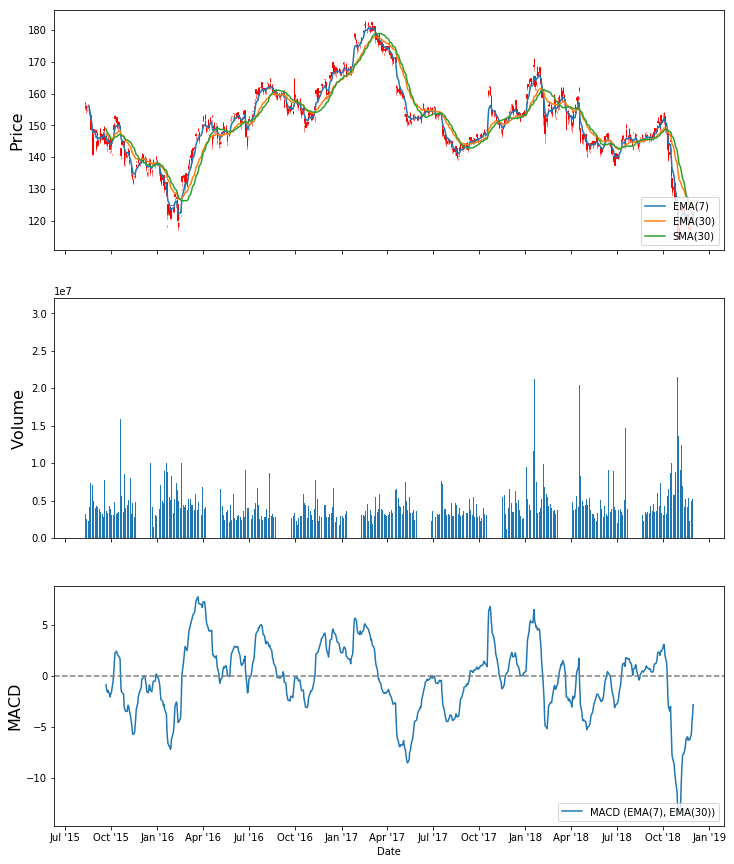

In [30]:
from datetime import datetime
plot_key_technical("IBM",datetime(2015, 8, 8),datetime.today())

In [31]:
def plot_price(ticker,start,end):
    import matplotlib.patches as mpatches
    import matplotlib.pyplot as plt
    from pandas_datareader import data as web
    temp_df = web.DataReader(ticker,"yahoo",start,end)
    plt.figure(figsize=(8,5))
    plt.plot(temp_df.index,temp_df.iloc[:,3],'b')
    plt.title(ticker + " Stock Price",fontsize=20)
    plt.xlabel('Date') 
    plt.ylabel('Price($)')
    plt.show()

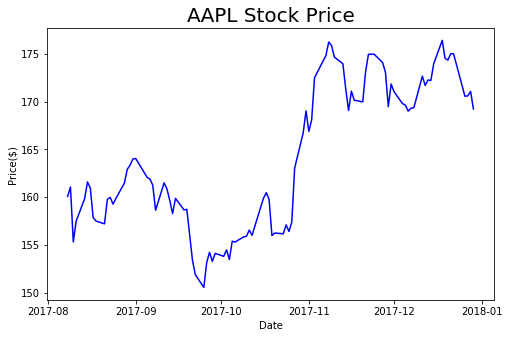

In [32]:
from datetime import datetime
plot_price("AAPL",datetime(2017, 8, 8),datetime(2018, 1, 1))

In [97]:
def plot_technical_stats(ticker,stat,start,end,color = 'b'):
    """
    Supported statistics/indicators are:
        change (in percent)
        delta
        permutation (zero based)
        log return
        max in range
        min in range
        middle = (close + high + low) / 3
        SMA: simple moving average
        EMA: exponential moving average
        MSTD: moving standard deviation
        MVAR: moving variance
        RSV: raw stochastic value
        RSI: relative strength index
        KDJ: Stochastic oscillator
        Bolling: including upper band and lower band.
        MACD: moving average convergence divergence. Including signal and histogram.
        CR:
        WR: Williams Overbought/Oversold index
        CCI: Commodity Channel Index
        TR: true range
        ATR: average true range
        line cross check, cross up or cross down.
        DMA: Different of Moving Average (10, 50)
        DMI: Directional Moving Index, including
        +DI: Positive Directional Indicator
        -DI: Negative Directional Indicator
        ADX: Average Directional Movement Index
        ADXR: Smoothed Moving Average of ADX
        TRIX: Triple Exponential Moving Average
        VR: Volatility Volume Ratio
    """ 
    import matplotlib.patches as mpatches
    import matplotlib.pyplot as plt
    from pandas_datareader import data as web
    from stockstats import StockDataFrame as Sdf
    stock = web.get_data_yahoo(ticker)
    stock_df = Sdf.retype(stock)
    stock[stat]=stock_df[stat]
    plt.figure(figsize=(8,5))
    plt.plot(stock.index,stock[stat],color)
    plt.title(stat + " for " + ticker,fontsize=20)
    plt.xlabel('Date') 
    plt.ylabel(stat)
    plt.show()

/usr/local/lib/python3.6/site-packages/stockstats.py:387: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  lambda x: np.fabs(x - x.mean()).mean())


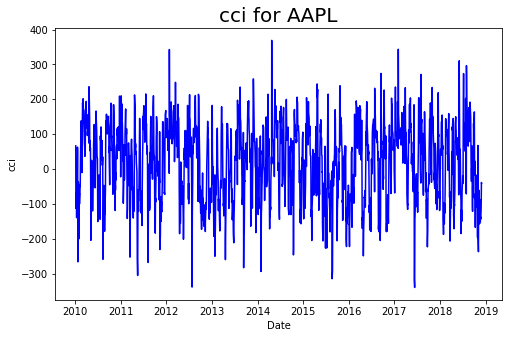

In [95]:
plot_technical_stats("AAPL",'cci',datetime(2008, 8, 8),datetime(2018, 1, 1))

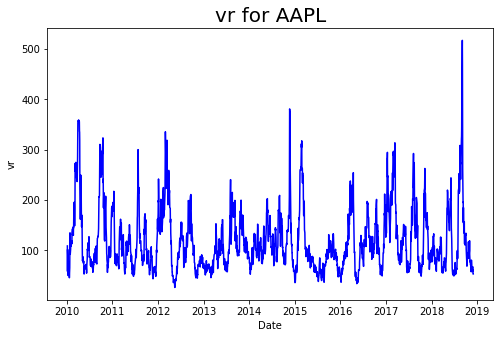

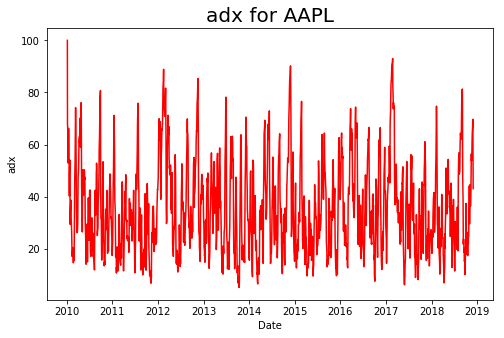

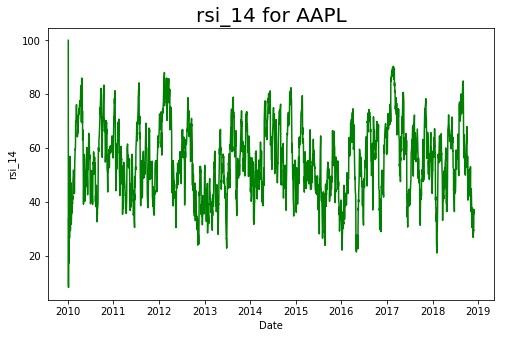

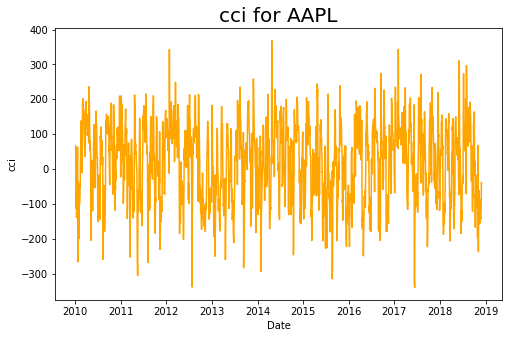

In [98]:
from datetime import datetime
plot_technical_stats("AAPL",'vr',datetime(2008, 8, 8),datetime(2018, 1, 1))
plot_technical_stats("AAPL",'adx',datetime(2008, 8, 8),datetime(2018, 1, 1),'r')
plot_technical_stats("AAPL",'rsi_14',datetime(2008, 8, 8),datetime(2018, 1, 1),'green')
plot_technical_stats("AAPL",'cci',datetime(2008, 8, 8),datetime(2018, 1, 1),'orange')

In [80]:
def pipline(ticker,start,end):
    plot_price(ticker,start,end)
    print('Company Summary')
    print(get_summary(ticker))
    get_recent_news(ticker)
    comp_stat_table(ticker)
    get_analysis(ticker)
    get_income_table(ticker)
    plot_key_technical(ticker,start,end)
    plot_technical_stats(ticker,'vr',start,end)

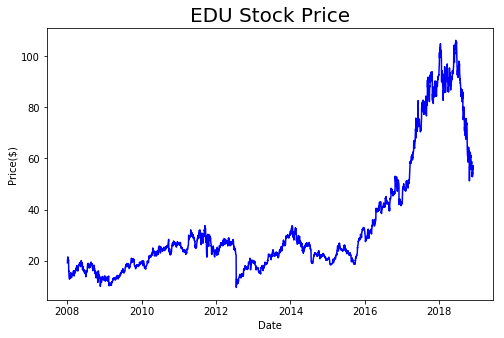

Company Summary
New Oriental Education & Technology Group Inc. provides private educational services under the New Oriental brand in the People's Republic of China. It operates through Language Training and Test Preparation Courses, and Others segments. The company offers test preparation courses to students taking language and entrance exams used by educational institutions in the United States, the People's Republic of China, and the Commonwealth countries; and after-school tutoring courses for middle and high school students to achieve better scores on entrance exams for admission into high schools or higher education institutions, as well as for children to teach English. It also provides language training courses, including English, as well as other foreign languages, such as German, Japanese, French, Korean, Italian, and Spanish; operates a full-time private primary and secondary school in Yangzhou seeking a full curriculum taught in Chinese and English; develops and edits educat

,Price,Market Cap (intraday),Enterprise Value,Forward P/E,EBITDA,Total Cash Per Share,Dividend Date,Ex-Dividend Date,Last Split Factor (new per old),52 Week High
EDU,57.16,9.07B,6.42B,17.92,346.31M,16.6,N/A,N/A,N/A,108.40
JCI,34.78,32.14B,43.02B,11.08,4.46B,0.22,"Oct 12, 2018","Sep 21, 2018",1000/955,41.53
IT,153.19,13.92B,15.33B,35.71,570.39M,2.32,N/A,N/A,N/A,161.21
TAL,28.07,15.92B,14.74B,42.53,339.75M,2.9,N/A,N/A,N/A,47.63
SCI,46.20,8.36B,11.58B,23.22,878M,0.88,"Dec 31, 2018","Dec 13, 2018",1/2,46.34


 
Analysis Information:


,Earnings Estimate,Current Qtr. (Nov 2018),Next Qtr. (Feb 2019),Current Year (2019),Next Year (2020)
0,No. of Analysts,11.00,10.00,22.00,23.00
1,Avg. Estimate,0.05,0.60,2.37,3.19
2,Low Estimate,-0.15,0.39,2.04,2.47
3,High Estimate,0.14,0.79,2.74,3.71
4,Year Ago EPS,0.09,0.57,2.23,2.37


,Revenue Estimate,Current Qtr. (Nov 2018),Next Qtr. (Feb 2019),Current Year (2019),Next Year (2020)
0,No. of Analysts,12,11,27,27
1,Avg. Estimate,580.86M,766.91M,3.11B,3.94B
2,Low Estimate,565.9M,700.5M,2.88B,3.43B
3,High Estimate,589.49M,789M,3.33B,4.54B
4,Year Ago Sales,467.18M,618.08M,2.45B,3.11B
5,Sales Growth (year/est),24.30%,24.10%,26.90%,26.80%


,Earnings History,11/29/2017,2/27/2018,5/30/2018,8/30/2018
0,EPS Est.,0.11,0.53,0.53,1.19
1,EPS Actual,0.09,0.57,0.55,1.16
2,Difference,-0.02,0.04,0.02,-0.03
3,Surprise %,-18.20%,7.50%,3.80%,-2.50%


,EPS Trend,Current Qtr. (Nov 2018),Next Qtr. (Feb 2019),Current Year (2019),Next Year (2020)
0,Current Estimate,0.05,0.60,2.37,3.19
1,7 Days Ago,0.05,0.60,2.37,3.19
2,30 Days Ago,0.06,0.62,2.44,3.28
3,60 Days Ago,0.18,0.77,2.97,4.00
4,90 Days Ago,0.18,0.77,2.97,4.02


,EPS Revisions,Current Qtr. (Nov 2018),Next Qtr. (Feb 2019),Current Year (2019),Next Year (2020)
0,Up Last 7 Days,NaN,NaN,1.0,1.0
1,Up Last 30 Days,NaN,NaN,1.0,1.0
2,Down Last 7 Days,NaN,NaN,NaN,NaN
3,Down Last 30 Days,NaN,NaN,NaN,NaN


,Growth Estimates,EDU,Industry,Sector,S&P 500
0,Current Qtr.,-44.40%,NaN,NaN,0.48
1,Next Qtr.,5.30%,NaN,NaN,0.40
2,Current Year,6.30%,NaN,NaN,0.21
3,Next Year,34.60%,NaN,NaN,0.10
4,Next 5 Years (per annum),17.51%,NaN,NaN,0.11
5,Past 5 Years (per annum),26.79%,NaN,NaN,NaN


Income Statement Table:


,Revenue,5/31/2018,5/31/2017,5/31/2016,5/31/2015
0,Total Revenue,2447430,1799509,1478348,1246766
1,Cost of Revenue,1065740,749586,614364,526320
2,Gross Profit,1381690,1049923,863984,720446
3,Operating Expenses,NaN,NaN,NaN,NaN
4,Research Development,-,-,-,-
5,Selling General and Administrative,1118731,787774,668907,566917
6,Non Recurring,-,-,-,-
7,Others,-,-,-,-
8,Total Operating Expenses,2184471,1537360,1283271,1093237
9,Operating Income or Loss,262959,262149,195077,153529


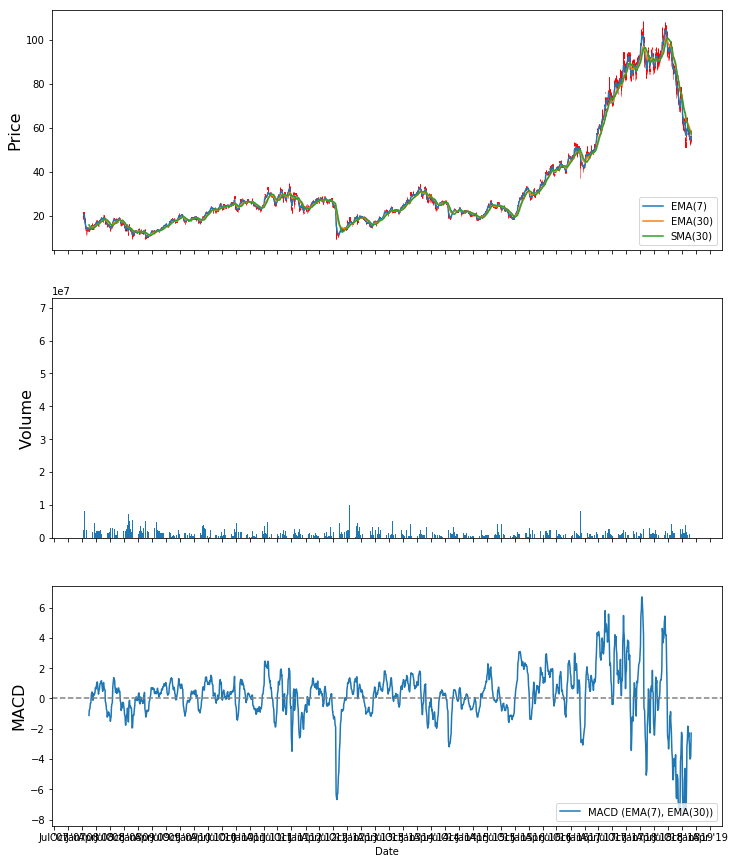

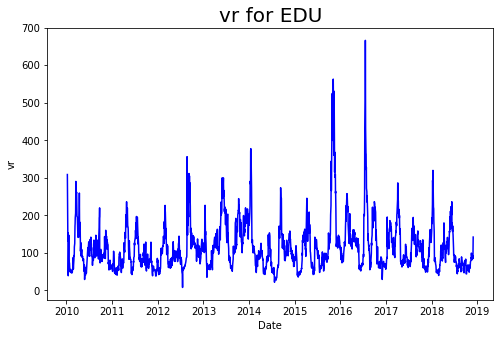

In [89]:
from datetime import datetime
pipline("EDU",datetime(2008, 1, 1),datetime.today())